Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
df1=pd.read_csv("CarPrice_project.csv")

Making copy of the primary data frame

In [2]:
df2=df1.copy()

Data Preprocessing

In [ ]:
df2.shape

(205, 26)

In [ ]:
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df2.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df2.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
df2.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [ ]:
df2.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [3]:
df2.drop(columns=['car_ID','CarName'],inplace=True)

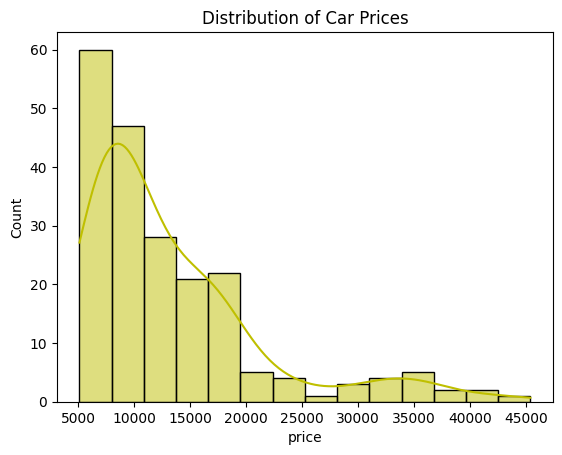

In [ ]:
sns.histplot(df2['price'],kde=True,color='y')
plt.title('Distribution of Car Prices')
plt.show()

Scatter Plots

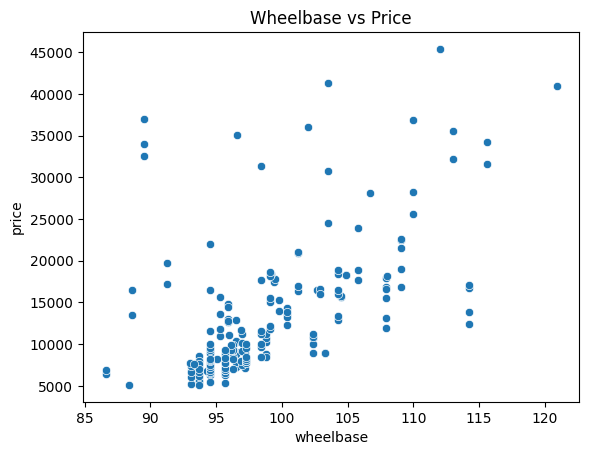

In [ ]:
sns.scatterplot(x='wheelbase',y='price',data=df2)
plt.title('Wheelbase vs Price')
plt.show()

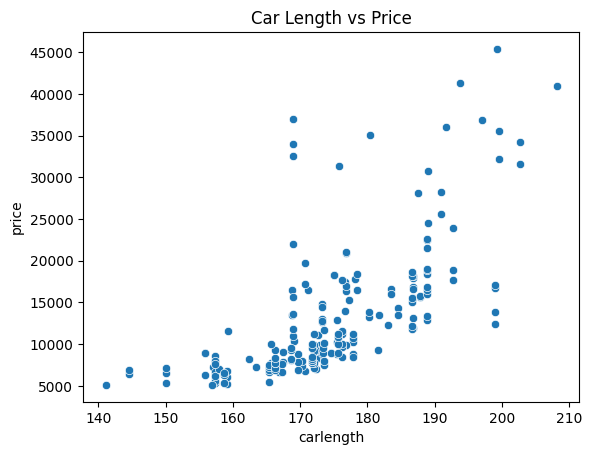

In [ ]:
sns.scatterplot(x='carlength',y='price',data=df2)
plt.title('Car Length vs Price')
plt.show()

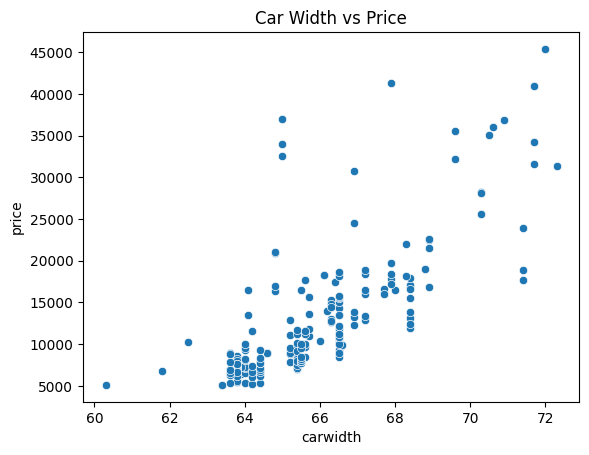

In [ ]:
sns.scatterplot(x='carwidth',y='price',data=df2)
plt.title('Car Width vs Price')
plt.show()

Boxplot

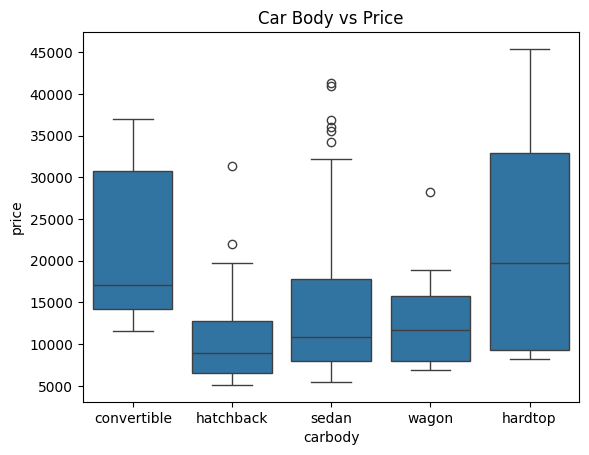

In [ ]:
sns.boxplot(x='carbody',y='price',data=df2)
plt.title('Car Body vs Price')
plt.show()

Converting categorical data into numerical data

In [4]:
df2=pd.get_dummies(df2,drop_first=True)

Finding correlation with price

In [ ]:
corr_price=df2.corr()['price'].sort_values(ascending=False)
print(corr_price)

price                    1.000000
enginesize               0.874145
curbweight               0.835305
horsepower               0.808139
carwidth                 0.759325
carlength                0.682920
drivewheel_rwd           0.638957
wheelbase                0.577816
boreratio                0.553173
fuelsystem_mpfi          0.517075
cylindernumber_six       0.474978
enginetype_ohcv          0.385991
enginelocation_rear      0.324973
cylindernumber_five      0.249606
carbody_hardtop          0.225854
cylindernumber_twelve    0.199634
aspiration_turbo         0.177926
enginetype_dohcv         0.159225
carbody_sedan            0.125716
carheight                0.119336
fuelsystem_idi           0.105679
stroke                   0.079443
compressionratio         0.067984
enginetype_l             0.042267
enginetype_ohcf          0.016285
fuelsystem_mfi          -0.002747
enginetype_rotor        -0.004544
cylindernumber_two      -0.004544
fuelsystem_4bbl         -0.017306
fuelsystem_spf

Correlation Heatmap of selected features

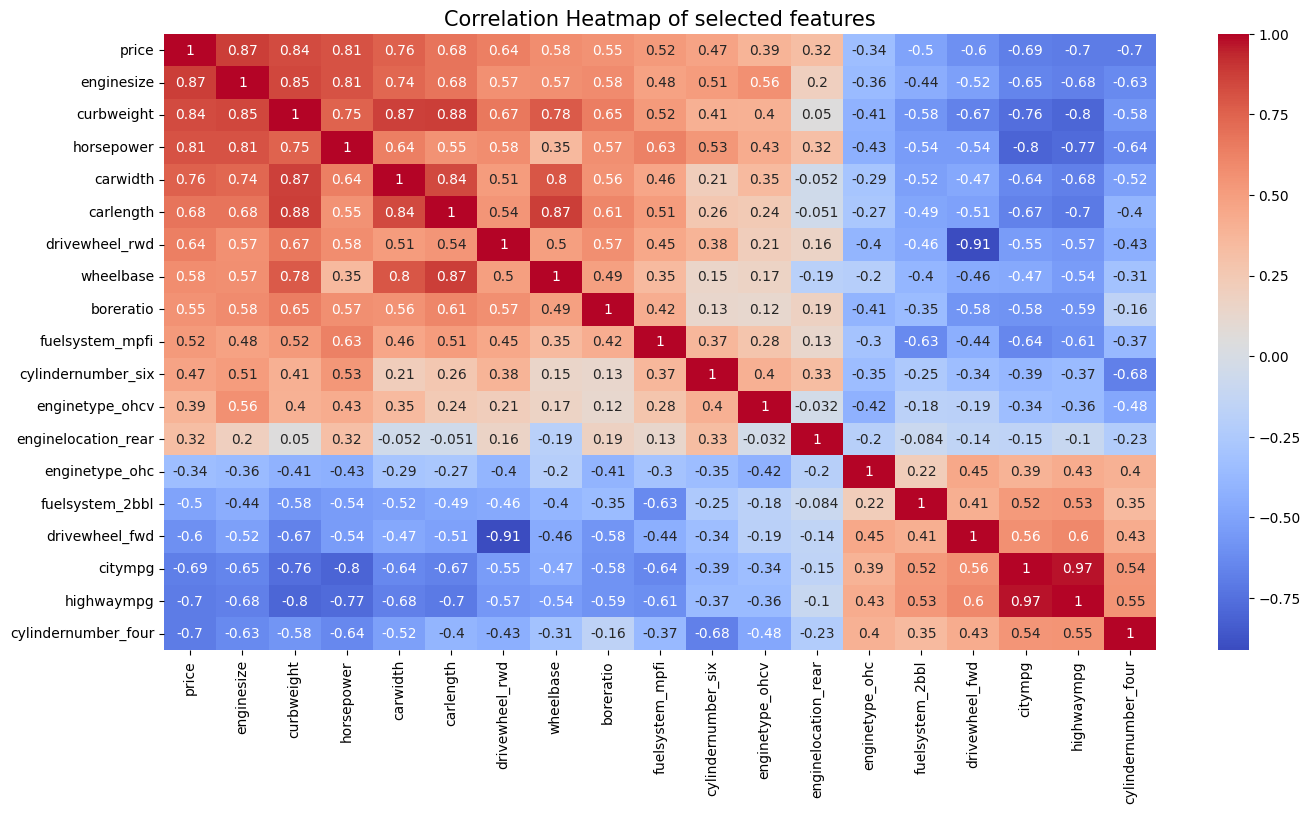

In [ ]:
selectedFeatures=['price','enginesize','curbweight','horsepower','carwidth','carlength','drivewheel_rwd','wheelbase','boreratio','fuelsystem_mpfi','cylindernumber_six','enginetype_ohcv','enginelocation_rear','enginetype_ohc','fuelsystem_2bbl','drivewheel_fwd','citympg','highwaympg','cylindernumber_four']
plt.figure(figsize=(16,8))
sns.heatmap(df2[selectedFeatures].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of selected features",fontsize=15)
plt.show()

Applying Linear Regression

In [11]:
top_features=['enginesize','horsepower','carwidth','drivewheel_rwd','wheelbase','fuelsystem_mpfi','cylindernumber_six','enginetype_ohcv','fuelsystem_2bbl','citympg','drivewheel_fwd','cylindernumber_four']
X=df2[top_features]
y=df2['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

Calculating R² and rmse for training and test data

In [15]:
y_trainPred=LR.predict(X_train)
y_testPred=LR.predict(X_test)
train_r2=r2_score(y_train,y_trainPred)
test_r2=r2_score(y_test,y_testPred)
train_rmse=np.sqrt(mean_squared_error(y_train,y_trainPred))
test_rmse=np.sqrt(mean_squared_error(y_test,y_testPred))
print(f"Train R²:{train_r2}, Train RMSE:{train_rmse}")
print(f"Test R²:{test_r2}, Test RMSE:{test_rmse}")

Train R²:0.8588207586246062, Train RMSE:2901.6589460902073
Test R²:0.8761701843779871, Test RMSE:3126.5993587264015


Scatter Plot : Actual Price vs Predicted Price

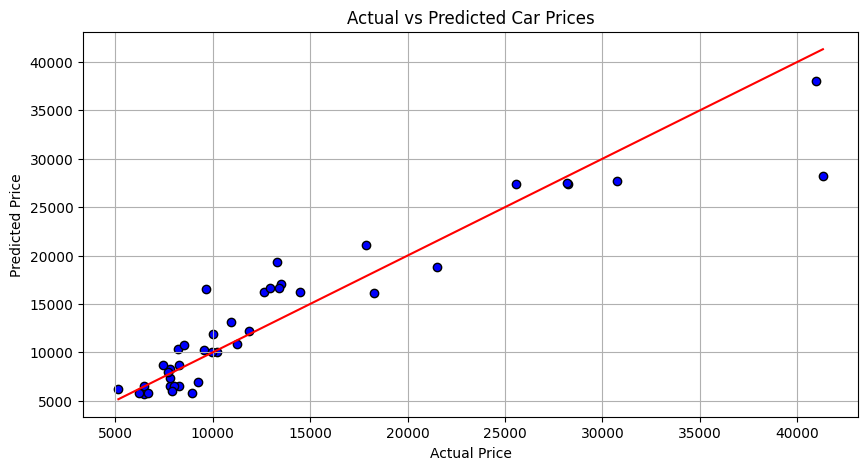

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,color='blue',edgecolor='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()